In [1]:
import sys
sys.path.append(r'/home/santiago/Documents/dev/reservoirpy')

In [2]:
from reservoirpy.wellproductivitypy import decline as dc
from reservoirpy.wellproductivitypy import pi
from datetime import date, timedelta
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
qi = 680 #bbl/d
di = 0.28 #Annual declination in fraction
ti = date(2020,5,1) #Time for initial flow
b = 0

c = dc.declination(qi=qi,di=di,ti=ti)
print(c)

Exponential Declination 
 Ti: 2020-05-01 
 Qi: 680 bbl/d 
 Rate: 0.28 Annually 
 b: 0


In [4]:
fr,np = c.forecast(date(2020,2,1),date(2021,12,31),fq='2m')
print(fr)
print('Cummulative production is: ', np)

              rate        cum
time                         
2020-02-29  713.12     713.12
2020-04-30  680.52   42224.96
2020-06-30  649.41   81839.01
2020-08-31  619.25  120232.31
2020-10-31  590.94  156279.46
2020-12-31  563.92  190678.66
2021-02-28  538.97  222477.71
2021-04-30  514.33  253851.68
2021-06-30  490.81  283791.34
2021-08-31  468.02  312808.37
2021-10-31  446.62  340052.22
2021-12-31  426.20  366050.58
Cummulative production is:  366050.58


In [5]:
c.forecast()

(              rate        cum
 time                         
 2020-05-31  664.53     664.53
 2020-06-30  649.41   20146.85
 2020-07-31  634.15   39805.48
 2020-08-31  619.25   59002.13
 2020-09-30  605.16   77156.88
 2020-10-31  590.94   95475.92
 2020-11-30  577.49  112800.70
 2020-12-31  563.92  130282.26
 2021-01-31  550.67  147353.00
 2021-02-28  538.97  162444.08
 2021-03-31  526.30  178759.41
 2021-04-30  514.33  194189.23,
 194189.23)

In [6]:
fr, np = c.forecast(econ_limit=300, fq='3m')
print(fr)
print('Cummulative ',np)

              rate        cum
time                         
2020-05-31  664.53     664.53
2020-08-31  619.25   57635.23
2020-11-30  577.49  110187.05
2021-02-28  538.97  158694.08
2021-05-31  502.24  204900.21
2021-08-31  468.02  247957.74
2021-11-30  436.46  287675.55
2022-02-28  407.34  324336.38
2022-05-31  379.59  359258.22
2022-08-31  353.72  391800.40
2022-11-30  329.87  421818.47
2023-02-28  307.86  449526.13
Cummulative  449526.13


In [7]:
k=200
h=10
mu=4
bo=1.2
j = pi.oil_j(k=k,h=h,mu=mu,bo=bo)
print(j)

0.41541931885744227


In [8]:
k=200
h=10
mu=4
bo=1.2

j = pi.oil_j(kh=k*h,mu=mu,bo=bo,s=1.4)
print(j)

0.34700744297908104


In [9]:
pr = 4950 # reservoi pressure 
pb = 3200 # psi

p=pi.oil_inflow(pr=pr,j=j,pb=pb)
print(p)

Oil Inflow: 
            Reservoir Pressure: 4950 psi 
            Productivity Index: 0.35 bbl/d*psi 
            Bubble Point Pressure: 3200 psi  
            AOF = 1224.17 bbl/d 
                


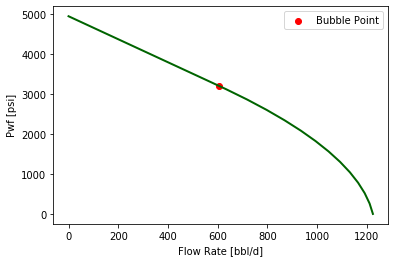

In [10]:
p.plot()

In [11]:
# Pwf to flow 
print('Pwf to flow')
print(p.pwf_to_flow(2000))
print(p.pwf_to_flow([3500,2000]))

# Flow to Pwf
print('Flow to Pwf')
print(p.flow_to_pwf(800))
print(p.flow_to_pwf([500,800,1000]))

# Flow to DD
print('Flow to DD')
print(p.flow_to_dd(800))
print(p.flow_to_dd([500,800,1000]))

# DD to flow
print('DD to Flow')
print(p.dd_to_flow(800))
print(p.dd_to_flow([500,800,1000]))

Pwf to flow
[953.55487882]
[503.16079232 953.55487882]
Flow to Pwf
[2592.97198616]
[3509.10871621 2592.97198616 1791.77329738]
Flow to DD
[2357.02801384]
[1440.89128379 2357.02801384 3158.22670262]
DD to Flow
[277.60595438]
[173.50372149 277.60595438 347.00744298]


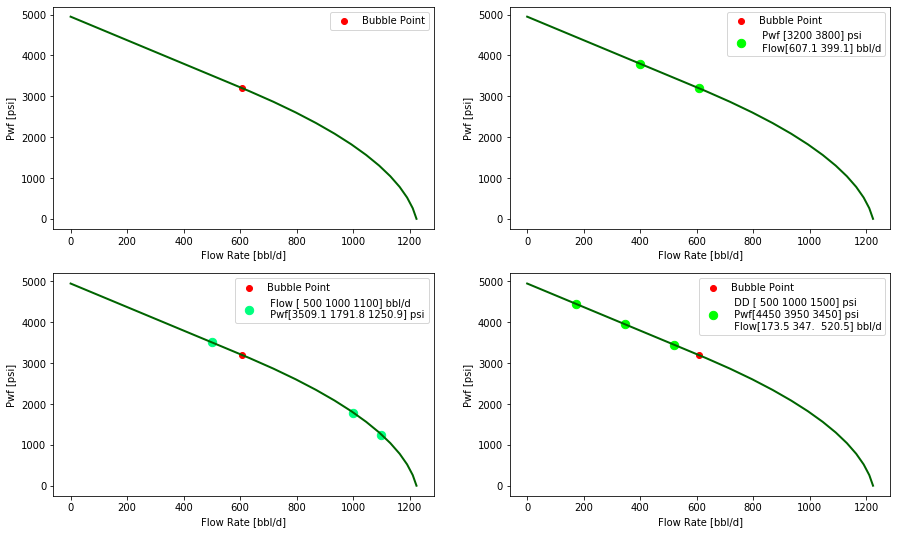

In [12]:
fig,ax = plt.subplots(2,2, figsize=(15,9))

p.plot(ax=ax[0,0])
p.plot(pwf=[3200,3800], ax=ax[0,1])
p.plot(flow=[500,1000,1100], ax=ax[1,0])
p.plot(dd=[500,1000,1500], ax=ax[1,1])
